# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [36]:
# importação da biblioteca para manipulação dos dados
import pandas as pd

In [37]:
# Criando variável para receber o arquivo com base de dados
tabela = pd.read_csv(
    r'C:\Users\Virtual Office\Python\Módulo 50 - Python aplicação no mercado de trabalho\Aula 4\Aula 4\barcos_ref.csv'
)
# Visualizando a base de dados
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [38]:
# Com esse comando consigo verificar o tipo de dados que estou manipulando, isso me auxiliar na forma como  vou trabalhar com
#cada tipo de dado. Cada tipo há uma maneira de manipular e tratar. 
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


In [39]:
# Com esse comando consigo verificar correção que informações tem entre si, dessa forma consigo identificar dados que estão
#correlacionados e não correlacionados.
correlacao = tabela.corr()[['Preco']]
display(tabela.corr()[['Preco']])

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


In [40]:
# importando as bibliotecas de criação de gráficos.
import seaborn  as sns 
import matplotlib.pyplot as plt

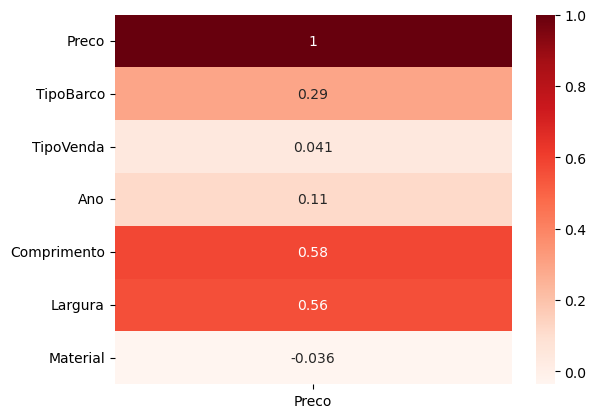

In [41]:
# Com o gráfico mapa de calor consigo de forma visual, notar os fatores que estão mais e menos correlacionados
# criação do gráfico 
sns.heatmap(correlacao, cmap = 'Reds', annot = True)
#exibição do gráfico
plt.show()

In [42]:
# Os dados que serão previstos
y = tabela['Preco']
# As características do barco a serem análisadas para construção da previsão de preço
x = tabela.drop('Preco', axis = 1)

# Train Test Split 
from sklearn.model_selection import train_test_split
# x_treino e x_teste são os dados das característica para a IA treinar e testar
# y_treino e y_teste são os dados de preço para a IA testar e treinar
# A partir dos treinos e testes na base de características, a IA compreenderá o que influcia o preço e então fazer as previsão
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3)


In [43]:
# Importação da inteligência artificial
    # - RegressaoLinear  e ArvoredeDecisão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Criação da inteligência artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()
# Treinamento da inteligência artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [44]:
# Escolha do melhor modelo de previsão através do R2( 0 -> 100%)
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.37333363010000664
0.7846486431794477


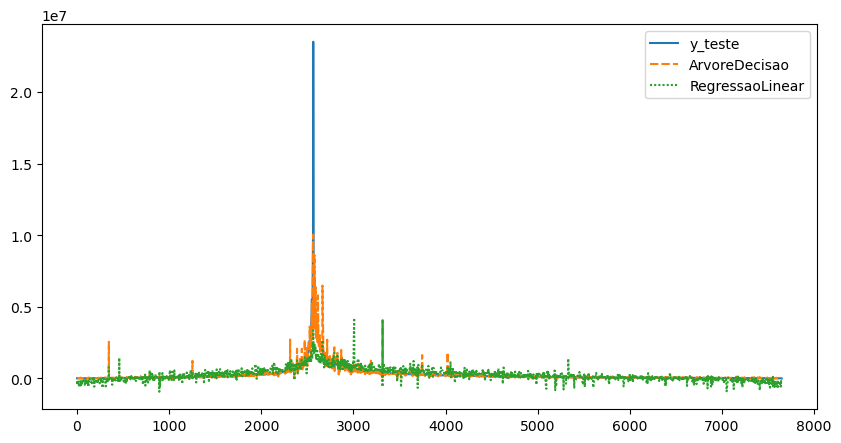

In [45]:
# Com o gráfico de linhas consigo visualizar a precisão de cada modelo de previsão.
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['ArvoreDecisao'] = previsao_arvoredecisao
tabela_auxiliar['RegressaoLinear'] = previsao_regressaolinear
plt.figure(figsize=(10,5))
sns.lineplot(data = tabela_auxiliar)
plt.show()

In [48]:
tabela_nova = pd.read_csv(
    r'C:\Users\Virtual Office\Python\Módulo 50 - Python aplicação no mercado de trabalho\Aula 4\Aula 4\novos_barcos.csv'
)

display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)

print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6164.02533333  8683.62       23887.0875    ]
